<a href="https://colab.research.google.com/github/nathsmo/Masculinity_test_analysis/blob/master/Masculinity_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Masculity survey analysis </center>
## <center> Nathalia Morales </center>
### <center> Research proyect February 2019</center>


* Link to dataset: https://github.com/fivethirtyeight/data/tree/master/masculinity-survey
* Description of data according to the original website of extraction:
  *  *This directory contains data behind the story What Do Men Think It Means To Be A Man?*
  * *masculinity-survey.csv contains the results of a survey of 1,615 adult men conducted by SurveyMonkey in partnership with FiveThirtyEight and WNYC Studios from May 10-22, 2018. The modeled error estimate for this survey is plus or minus 2.5 percentage points. The percentages have been weighted for age, race, education, and geography using the Census Bureau’s American Community Survey to reflect the demographic composition of the United States age 18 and over. Crosstabs with less than 100 respondents have been left blank because responses would not be statistically significant.*

  * *raw-responses.csv contains all 1,615 responses to the survey including the weights for each response. Responses to open-ended questions have been omitted, including those where a respondent explained what they meant by selecting the "other" option in response to a question.*

  * *masculinity-survey.pdf contains the questions corresponding to the colums in the raw responses file.*
  
  
 * Objetive:
   * The  objective of this analysis is to find pattern and discover statistics. Even if Machine Learning models are used to try to predict the data it is only for investigation purposes. This is for research and leisure purposes only, no real application is to be intended from this investigation. If you have questions about the data please ask the owner of the dataset.
   
* Disclaimer:
  * The author of this report is not owner not intends to take profit or recognition from the data used in this report. This report is used as a demonstration of technical skills and not for lucrative purposes. All of the findings in this report are meant for teaching purposes only. All the models in this report are meant for teaching purposes only.  The data used in this report is publicly available for anyone in the link above.


# Preliminary data visualization

## Importing the necessary libraries & data

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.csv', sep = ',')
df = pd.DataFrame(data=df)

## Replacement of values for later analysis

In [0]:
df.columns =['id','start','end','m_personal_feel','importance_other_see','where_good_man1_father','where_good_man2_mother', 'where_good_man4_family_members','where_good_man5_pop_culture','where_good_man3_friends','where_good_man6_others','society_preassure_unhealthy','friend_professional_advice','friend_personal_advice','physical_affection_male_friends','cry','physical_with_other_person','rel_women','rel_men','sports','workout','therapist','lonely','worry11_height','worry1_weight','worry8_hairline','worry4_physique','worry10_gen_app','worry9_clothing','worry7_sex','worry6_men_health','worry3_phy_health','worry2_finances','worry5_provide','worry12_none','employment_status','emAd1_B_money','emAd1_A_seriously','emAd1_C_choice','emAd1_D_promotion','emAd1_F_praised','emAd1_E_support','emAd1_G_other','emAd1_H_none','emDis_A_women','emDis_B_sex_harrass','emDis_C_sexist','emDis_D_other','emDis_E_none','emHar_E_confronted','emHar_A_HR','emHar_D_Manager','emHar_C_reachOut','emHar_noResponse','emHar_never','emHar_other','whyNoHarrasment','emMeToo','emMeToo_Heard','first_move','pay_first_date','pay_fd_right','pay_fd_money','pay_fd_feelgood','pay_fd_expect','pay_fd_obligated','pay_fd_offer','pay_fd_other','phyInterest_bodyLanguage','phyInterest_consent','phyInterest_phyMove','phyInterest_diff','phyInterest_notClear','phyInterest_other','sexBoundaries_toofar','sexBoundaries_talked','sexBoundaries_contacted','sexBoundaries_none','changed_behaviour_relationships','kind_relationship','children_18orless','children_18orolder','children_no','sexOrientation','race','education','state','salary_range','region','done_with','race2','racethn4','educ3','college','age3','kids','orientation','weight']
df = df.drop(['id','done_with','educ3'], axis=1)

In [0]:
df["m_personal_feel"] = df["m_personal_feel"].replace('Very masculine', 1)
df["m_personal_feel"] = df["m_personal_feel"].replace('Somewhat masculine', 0.5)
df["m_personal_feel"] = df["m_personal_feel"].replace('Not very masculine', -0.5)
df["m_personal_feel"] = df["m_personal_feel"].replace('Not at all masculine', -1)

df.importance_other_see = df.importance_other_see.replace('Very important', 1)
df.importance_other_see = df.importance_other_see.replace('Somewhat important', 0.5)
df.importance_other_see = df.importance_other_see.replace('Not too important', -0.5)
df.importance_other_see = df.importance_other_see.replace('Not at all important', -1)

df.where_good_man1_father = df.where_good_man1_father.replace('Father or father figure(s)', 1)
df.where_good_man2_mother = df.where_good_man2_mother.replace('Mother or mother figure(s)', 1)
df.where_good_man3_friends = df.where_good_man3_friends.replace('Friends', 1)
df.where_good_man5_pop_culture = df.where_good_man5_pop_culture.replace('Pop culture', 1)
df.where_good_man4_family_members = df.where_good_man4_family_members.replace('Other family members', 1)

df.pay_first_date = df.pay_first_date.replace('Always', 1)
df.pay_first_date = df.pay_first_date.replace('Often', 0.5)
df.pay_first_date = df.pay_first_date.replace('Sometimes',0)
df.pay_first_date = df.pay_first_date.replace('Rarely', -0.5)
df.pay_first_date = df.pay_first_date.replace('Never', -1)

df.emMeToo = df.emMeToo.replace('A lot', 1)
df.emMeToo = df.emMeToo.replace('Some', 0.5)
df.emMeToo = df.emMeToo.replace('Only a little', -0.5)
df.emMeToo = df.emMeToo.replace('Nothing at all', -1)

df.kids = df.kids.replace('Has children', 1)
df.kids = df.kids.replace('No children', -1)

df.sexBoundaries_none	= df.sexBoundaries_none	.replace("None of the above", 1)
df.worry12_none = df.worry12_none	.replace("None of the above", 1)
df.where_good_man6_others = df.where_good_man6_others	.replace("Other (please specify)", 1)
df.emAd1_H_none = df.emAd1_H_none.replace("None of the above", 1)
df.emAd1_G_other = df.emAd1_G_other.replace("None of the above", 1)
df.emHar_other = df.emHar_other.replace("None of the above", 1)

df = df.replace('Yes', 1)
df = df.replace('No', -1)

df = df.replace('Often', 1)
df = df.replace('Sometimes', 0.5)
df = df.replace('Rarely', 0)
df = df.replace('Never, but open to it', 0.25)
df = df.replace('Never, and not open to it', -1)


df = df.replace('Your weight', 1)
df = df.replace('Your height', 1)
df = df.replace('Your finances, including your current or future income, assets, or debt', 1)
df = df.replace('Your hair or hairline', 1)
df = df.replace('Your physique', 1)
df = df.replace('Appearance of your genitalia', 1)
df = df.replace('Your clothing or style', 1)
df = df.replace('Sexual performance or amount of sex', 1)
df = df.replace('Your mental health', 1)
df = df.replace('Your physical health', 1)
df = df.replace('Your ability to provide for your family, current or anticipated', 1)
df = df.replace('None of the above', 1)

df = df.replace('Men make more money', 1)
df = df.replace('Men are taken more seriously', 1)
df = df.replace('Men have more choice', 1)
df = df.replace('Men have more promotion/professional development opportunities', 1)
df = df.replace('Men are explicitly praised more often', 1)
df = df.replace('Men generally have more support from their managers', 1)
df = df.replace('Managers want to hire and promote women', 1)
df = df.replace('Greater risk of being accused of sexual harassment', 1)
df = df.replace('Greater risk of being accused of being sexist or racist', 1)

df = df.replace('Other (please specify)', 1)

df = df.replace('Confronted the accused person', 1)
df = df.replace('Contacted the HR department', 1)
df = df.replace('Contacted the manager of the accused person', 1)
df = df.replace('Reached out to the victim to offer support', 1)
df = df.replace('Did not respond at all', 1)
df = df.replace('Never witnessed sexual harassment', 1)

df = df.replace('You weren?t sure who to contact', 1)
df = df.replace('You weren?t sure it was sexual harassment', 1)
df = df.replace('You didn?t want to get involved', 1)
df = df.replace('You didn?t think it was your place', 1)

df = df.replace('It?s the right thing to do', 1)
df = df.replace('You make more money than your date', 1)
df = df.replace('You feel good about being the one who pays', 1)
df = df.replace('Societal expectations, even though you don?t always think you should have to pay', 1)
df = df.replace('You asked the person out, so you feel obligated to pay', 1)
df = df.replace('You try to pay to see if the other person will offer to share in the cost', 1)

df = df.replace('Read their physical body language to see if they are interested', 1)
df = df.replace('Ask for a verbal confirmation of consent', 1)
df = df.replace('Make a physical move to see how they react', 1)
df = df.replace('Every situation is different', 1)
df = df.replace('It isn?t always clear how to gauge someone?s interest', 1)

df = df.replace('Wondered whether you pushed a partner too far in a past sexual encounter.', 1)
df = df.replace('Talked with a friend or friends about whether you pushed a partner too far.', 1)
df = df.replace('Contacted a past sexual partner to ask whether you went too far in any of you sexual encounters.', 1)

df = df.replace('Yes, one or more children under 18', 1)
df = df.replace('Yes, one or more children 18 or older', 1)

df = df.replace('No children', 1)

In [0]:
df = df.replace('Not selected', 0)
df = df.replace('No answer', 0)
df = df.replace(np.nan, 0)

In [5]:
df.shape

(1615, 95)

In [6]:
df.isna().sum()

start                              0
end                                0
m_personal_feel                    0
importance_other_see               0
where_good_man1_father             0
where_good_man2_mother             0
where_good_man4_family_members     0
where_good_man5_pop_culture        0
where_good_man3_friends            0
where_good_man6_others             0
society_preassure_unhealthy        0
friend_professional_advice         0
friend_personal_advice             0
physical_affection_male_friends    0
cry                                0
physical_with_other_person         0
rel_women                          0
rel_men                            0
sports                             0
workout                            0
therapist                          0
lonely                             0
worry11_height                     0
worry1_weight                      0
worry8_hairline                    0
worry4_physique                    0
worry10_gen_app                    0
w

## Conversion of types by column

In [0]:
df.start = pd.to_datetime(df.start)
df.end = pd.to_datetime(df.end)

# Preliminary basic **analysis**

## Correlation Matrix

In [8]:
corr = df.corr()
corr.style.background_gradient()

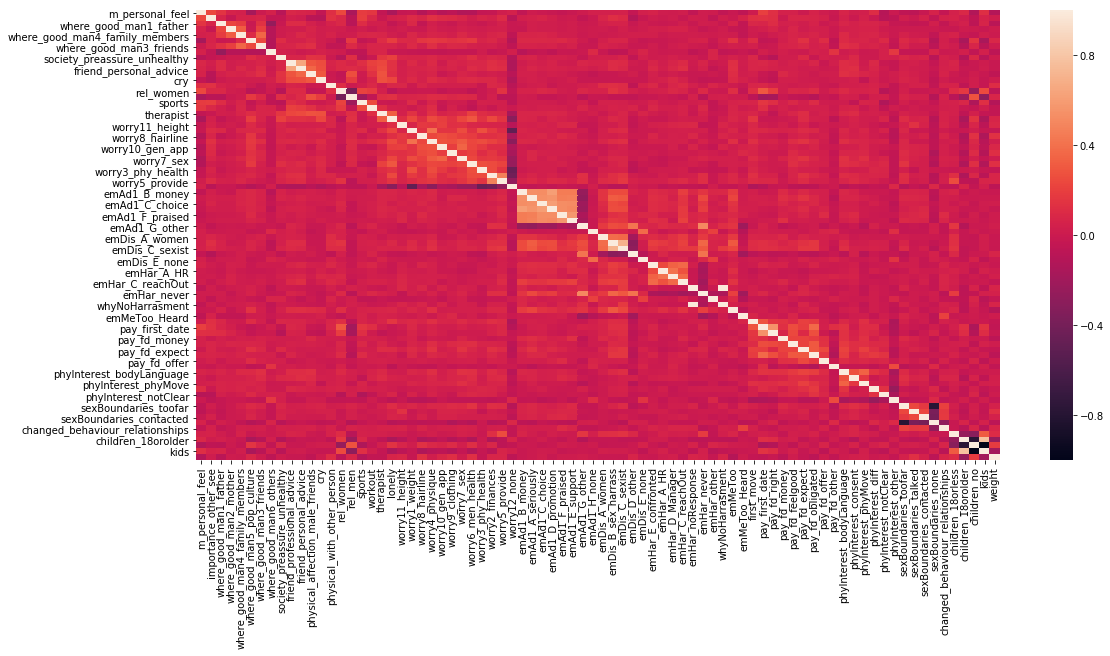

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 8.27)
sns.heatmap(corr)

In [0]:
sns.pairplot(df)

# Data Analysis

In [0]:
df.head()

In [0]:
df.college.unique()

array(['College or more', 'Some college', 'Post graduate degree',
       'High school or less'], dtype=object)

In [0]:
 df.columns

Index(['start', 'end', 'm_personal_feel', 'importance_other_see',
       'where_good_man1_father', 'where_good_man2_mother',
       'where_good_man4_family_members', 'where_good_man5_pop_culture',
       'where_good_man3_friends', 'where_good_man6_others',
       'society_preassure_unhealthy', 'friend_professional_advice',
       'friend_personal_advice', 'physical_affection_male_friends', 'cry',
       'physical_with_other_person', 'rel_women', 'rel_men', 'sports',
       'workout', 'therapist', 'lonely', 'worry11_height', 'worry1_weight',
       'worry8_hairline', 'worry4_physique', 'worry10_gen_app',
       'worry9_clothing', 'worry7_sex', 'worry6_men_health',
       'worry3_phy_health', 'worry2_finances', 'worry5_provide',
       'worry12_none', 'employment_status', 'emAd1_B_money',
       'emAd1_A_seriously', 'emAd1_C_choice', 'emAd1_D_promotion',
       'emAd1_F_praised', 'emAd1_E_support', 'emAd1_G_other', 'emAd1_H_none',
       'emDis_A_women', 'emDis_B_sex_harrass', 'emDis_C_s

In [0]:
columns = df.columns
for i in columns:
  fig, ax = plt.subplots()
  sns.countplot(x=i, data=df)
  fig.show()


### Machine Learning Models Implementation

In [0]:
df.salary_range = df.salary_range.replace('$0-$9,999', 10)
df.salary_range = df.salary_range.replace('$10,000-$24,999', 9)
df.salary_range = df.salary_range.replace('$25,000-$49,999', 8)
df.salary_range = df.salary_range.replace('$50,000-$74,999', 7)
df.salary_range = df.salary_range.replace('$75,000-$99,999', 6)
df.salary_range = df.salary_range.replace('$100,000-$124,999', 5)
df.salary_range = df.salary_range.replace('$125,000-$149,999', 4)
df.salary_range = df.salary_range.replace('$150,000-$174,999', 3)
df.salary_range = df.salary_range.replace('$175,000-$199,999', 2)
df.salary_range = df.salary_range.replace('$200,000+', 1)
df.salary_range = df.salary_range.replace('Prefer not to answer', 11)

In [0]:
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.externals.six import StringIO  
from sklearn import metrics
import pandas as pd
import numpy as np  
import pydotplus
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score
from pandas import DataFrame
import seaborn as sns
import scipy.stats as stats
import sklearn
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [0]:
fct_names = ['Regresion Linear', 'Regresion Ridge', 'Analisis de Componentes Principales']
col_names = ['Modelo', 'Score/Resultado']

# X = todas las variables a evaluar
# Y = la variable independiente a evaluar
# i = componentes para el PCA
# El máximo de los componentes evaluados es la cantidad de features (x) evaluadas dentro del modelo
# a = alpha a evaluar en la regresión Ridge

def fct_reg(x, y, i, a):
  resultados = []
  X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.3, random_state = 42)
  
  # Regresion Linear
  lm = LinearRegression()
  lm = lm.fit(X_train, Y_train)
  resultados.append(lm.score(X_test, Y_test))
  
  #Regresion Ridge
  rr = Ridge(alpha = a)
  rr.fit(X_train, Y_train)
  resultados.append(rr.score(X_test, Y_test))
  
  #Analisis de Componentes Principales PCA
  pca = PCA(n_components=i)
  sc = StandardScaler()  
  X_train = sc.fit_transform(X_train)  
  X_test = sc.transform(X_test)
  pca.fit(X_train, Y_train)
  resultados.append(pca.score(X_test, Y_test))
  
  resultados_finales = {'Score/Resultado' : resultados, 'Modelo:' : fct_names}
  
  tabla_final = pd.DataFrame(resultados_finales)
  print("")
  return(tabla_final)

In [34]:
x = df[['m_personal_feel', 'importance_other_see',
       'where_good_man1_father', 'where_good_man2_mother',
       'where_good_man4_family_members', 'where_good_man5_pop_culture',
       'where_good_man3_friends', 'where_good_man6_others',
       'society_preassure_unhealthy', 'friend_professional_advice',
       'friend_personal_advice', 'physical_affection_male_friends', 'cry',
       'physical_with_other_person', 'rel_women', 'rel_men', 'sports',
       'workout', 'therapist', 'lonely', 'worry11_height', 'worry1_weight',
       'worry8_hairline', 'worry4_physique', 'worry10_gen_app',
       'worry9_clothing', 'worry7_sex', 'worry6_men_health',
       'worry3_phy_health', 'worry2_finances', 'worry5_provide',
       'worry12_none', 'emAd1_B_money',
       'emAd1_A_seriously', 'emAd1_C_choice', 'emAd1_D_promotion',
       'emAd1_F_praised', 'emAd1_E_support', 'emAd1_G_other', 'emAd1_H_none',
       'emDis_A_women', 'emDis_B_sex_harrass', 'emDis_C_sexist',
       'emDis_D_other', 'emDis_E_none', 'emHar_E_confronted', 'emHar_A_HR',
       'emHar_D_Manager', 'emHar_C_reachOut', 'emHar_noResponse',
       'emHar_never', 'emHar_other', 'whyNoHarrasment', 'emMeToo',
       'emMeToo_Heard', 'first_move', 'pay_first_date', 'pay_fd_right',
       'pay_fd_money', 'pay_fd_feelgood', 'pay_fd_expect', 'pay_fd_obligated',
       'pay_fd_offer', 'pay_fd_other', 'phyInterest_bodyLanguage',
       'phyInterest_consent', 'phyInterest_phyMove', 'phyInterest_diff',
       'phyInterest_notClear', 'phyInterest_other', 'sexBoundaries_toofar',
       'sexBoundaries_talked', 'sexBoundaries_contacted', 'sexBoundaries_none',
       'changed_behaviour_relationships', 
       'children_18orless', 'children_18orolder', 'children_no']]
y = df['salary_range']

print("Salary prediction by all the other variables")
print("")

# i = componentes para el PCA
# El máximo de los componentes evaluados es la cantidad de features (x) evaluadas dentro del modelo
# a = alpha a evaluar en la regresión Ridge
# n = numero de vecinos cercanos a evaluar
# mf = max features en el modelo de random forest

i = 3
a = 3

fct_reg(x, y, i, a)

Prediccion del salario a partir del grupo de delitos




,Score/Resultado,Modelo:
0,0.027212,Regresion Linear
1,0.031156,Regresion Ridge
2,-106.867732,Analisis de Componentes Principales


In [0]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# plot
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
